In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet
import librosa
import os
import scipy.io.wavfile as wavfile
from IPython.display import Audio

### Loading 5 Data samples from each**

In [4]:
# Loading training data
base_dir = r"Signal Processing Datasets/BirdSongDataset/train"
cardinalis_dir = os.path.join(base_dir, 'CardinalisCardinalis')
melospiza_dir = os.path.join(base_dir, 'MelospizaMelodia')


In [5]:
# samples dictionary
samples = {}

for species, directory in zip(["Cardinalis Cardinalis", "Melospiza Melodia"],[cardinalis_dir, melospiza_dir]):
    samples[species] = []
    if os.path.isdir(directory):  
        for file_name in os.listdir(directory)[:5]:  # Loading 5 samples
            file_path = os.path.join(directory, file_name)
            sample_rate, audio_data = wavfile.read(file_path)
            samples[species].append((audio_data, sample_rate))
            print(f"Loaded {file_name} from {species} at sample rate {sample_rate} Hz")
            display(Audio(audio_data, rate=sample_rate))
    else:
        print(f"Directory {directory} does not exist.")

Loaded (1).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (10).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (100).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (11).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (12).wav from Cardinalis Cardinalis at sample rate 22050 Hz


Loaded (1).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (10).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (100).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (11).wav from Melospiza Melodia at sample rate 22050 Hz


Loaded (12).wav from Melospiza Melodia at sample rate 22050 Hz


In [ ]:
# CWT analysis on the samples using spectrogram
def plot_cwt_scipy(audio_data, sample_rate, title):
    #  Define the wavelet and scales...
    widths = np.arange(1, 256)
    
    # CWT using a Morlet wavelet...
    cwt_matrix = cwt(audio_data, morlet, widths)
    
    # Calculate frequencies approx....
    frequencies = sample_rate / (2 * np.pi * widths)
    
    # Plot the CWT
    plt.figure(figsize=(10, 6))
    plt.imshow(np.abs(cwt_matrix), extent=[0, len(audio_data) / sample_rate, frequencies[-1], frequencies[0]], 
               cmap='viridis', aspect='auto')
    plt.colorbar(label='Magnitude')
    plt.title(f"CWT of {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
   # plt.ylim(0, 10000)  
    plt.show()


### **Apply CWT on the first 5 *Cardinalis Cardinalis* samples**

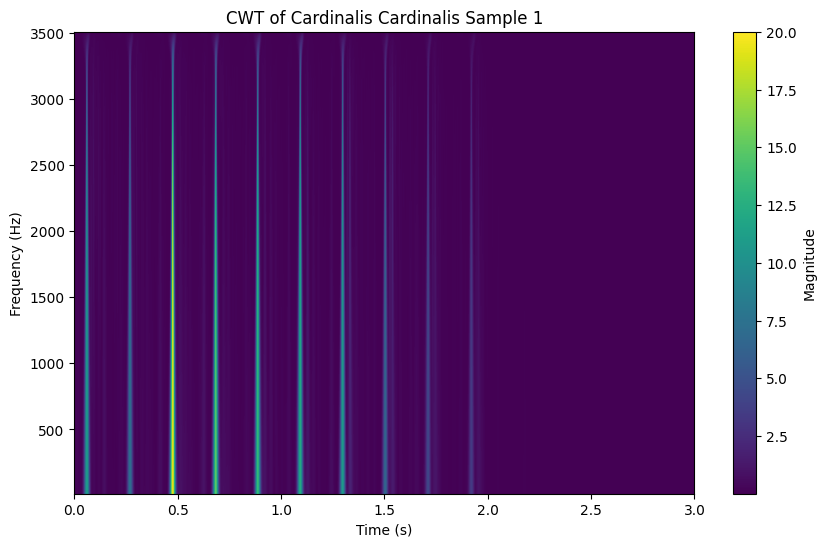

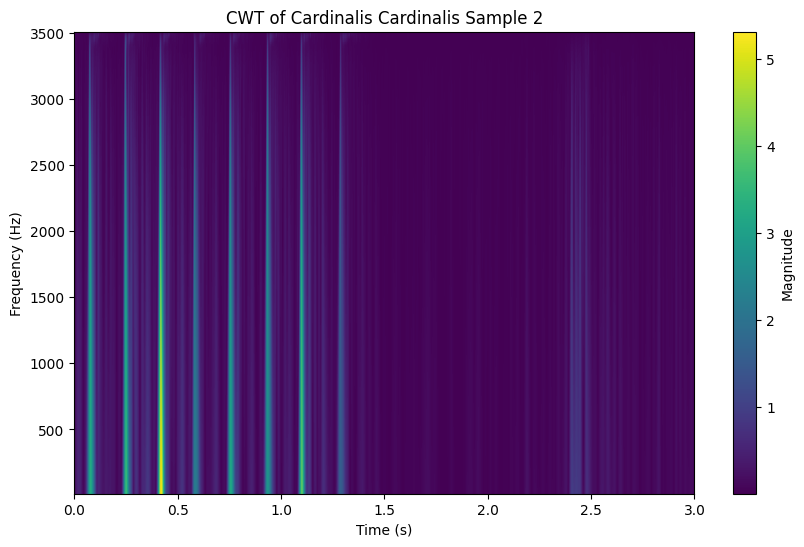

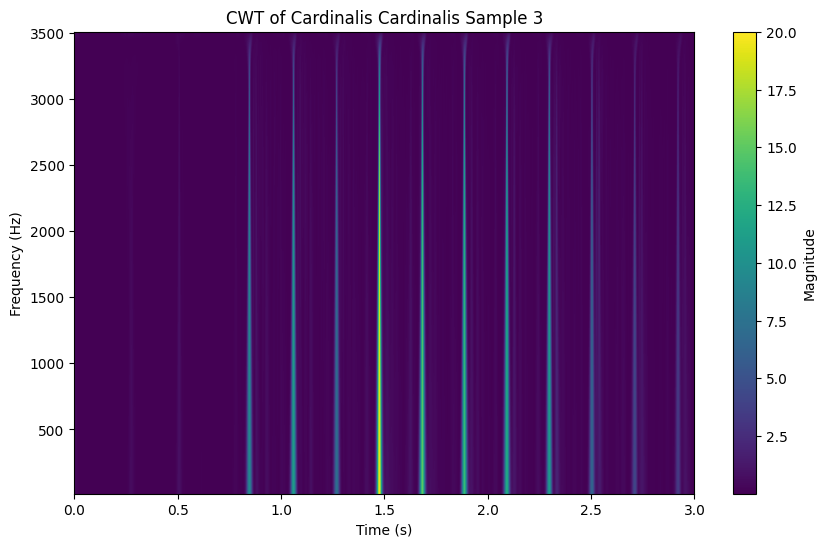

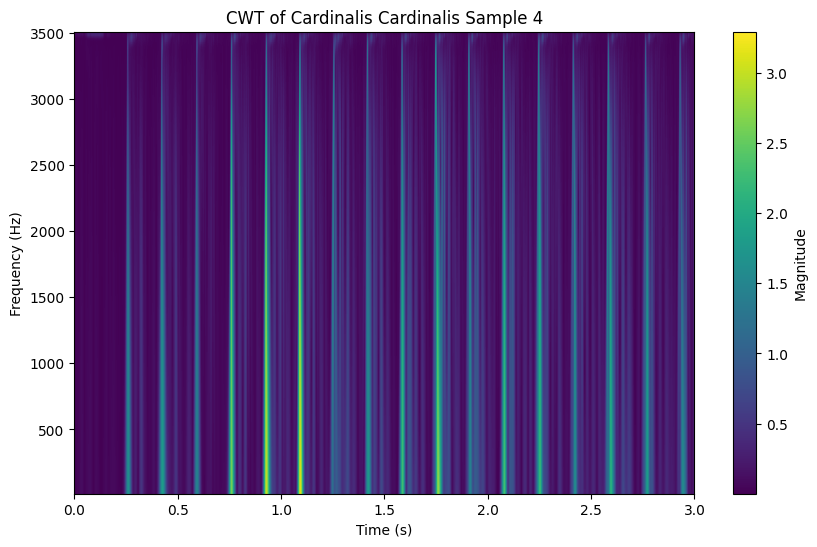

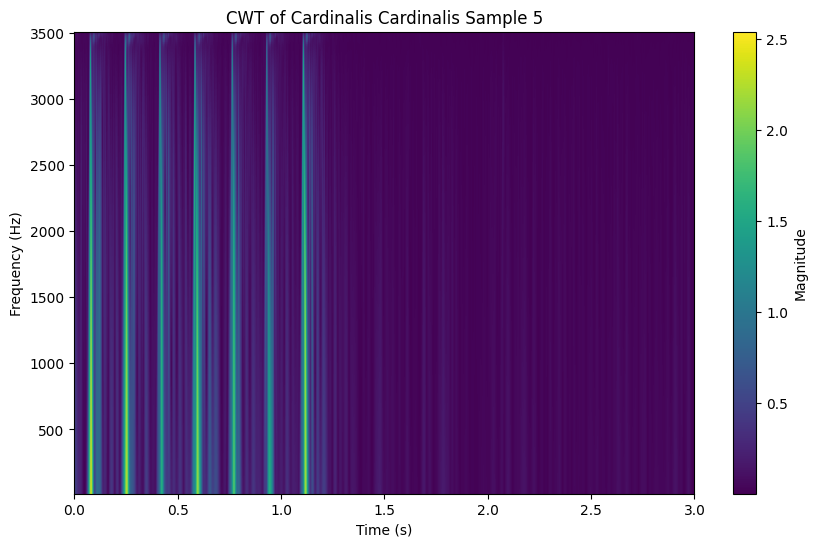

In [ ]:

for idx, (audio_data, sample_rate) in enumerate(samples["Cardinalis Cardinalis"]):
    title = f"Cardinalis Cardinalis Sample {idx + 1}"
    plot_cwt_scipy(audio_data, sample_rate, title)


### **Apply CWT on the first 5 *Melospiza Melodia* samples**

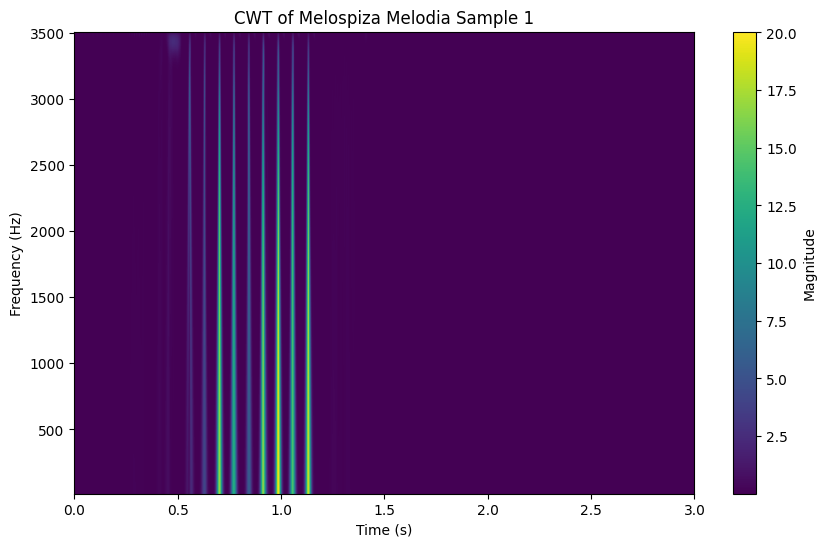

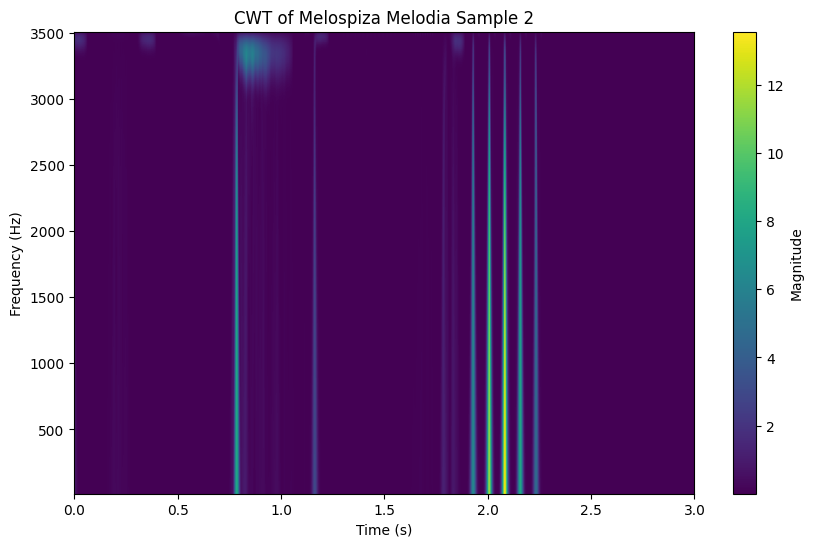

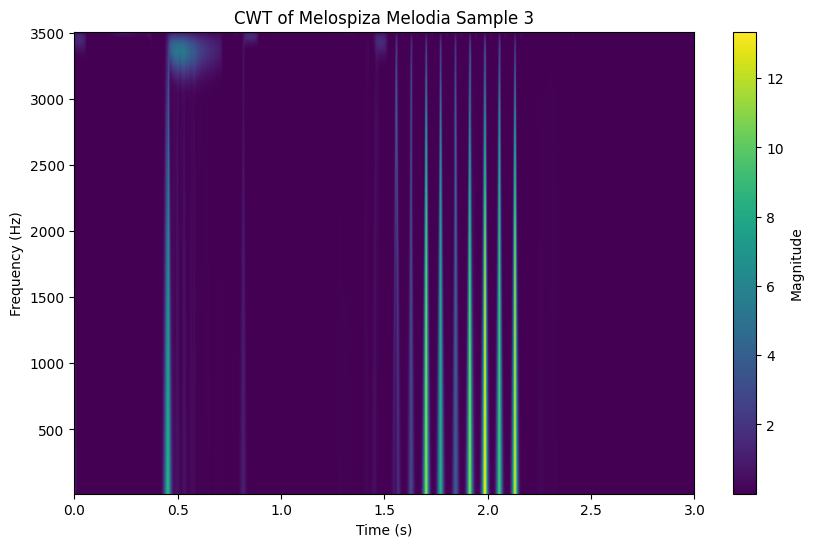

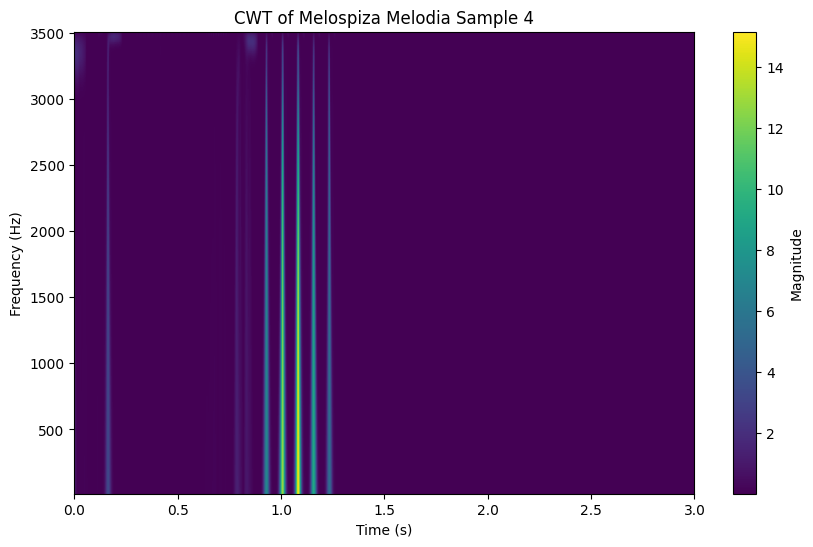

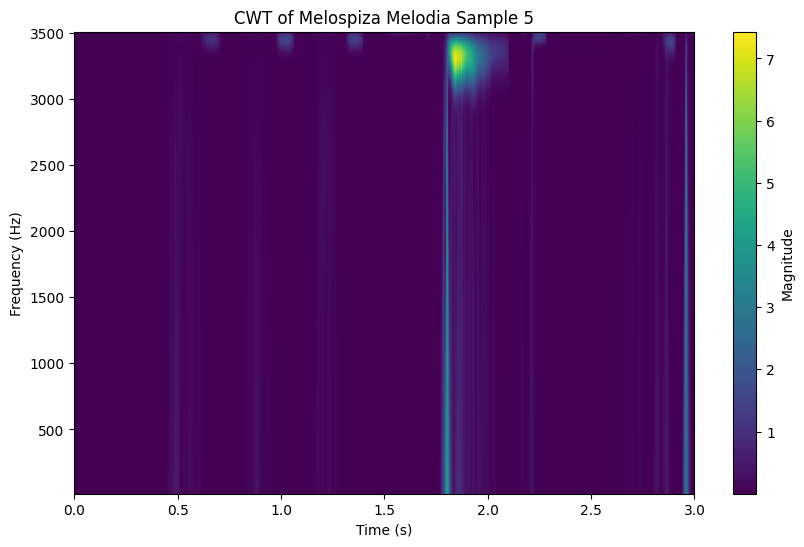

In [10]:

for idx, (audio_data, sample_rate) in enumerate(samples["Melospiza Melodia"]):
    title = f"Melospiza Melodia Sample {idx + 1}"
    plot_cwt_scipy(audio_data, sample_rate, title)
